<h1> Gradient Descent </h1>

In this notebook we will observe the Gradient Descent optimization technique and predict the salary of an employee based on the years of experience. 

### Table of Contents
1. [Loading the libraries and dataset](#lib)
2. [Exploration of data](#exp)
3. [Gradient Descent](#grad) 
4. [Linear Regression](#lr)
5. [Conclusion](#conc)

### 1. Loading the libraries and dataset  <a id='lib'>

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
# Loading the dataset
salary_df = pd.read_csv('Salary_Data.csv')

### 2. Exploration of data  <a id='exp'>

In [5]:
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


** Salary Dataframe has no null values **

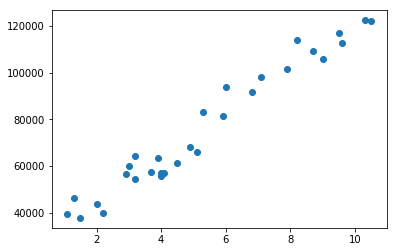

In [7]:
plt.scatter(x='YearsExperience', y='Salary', data=salary_df)

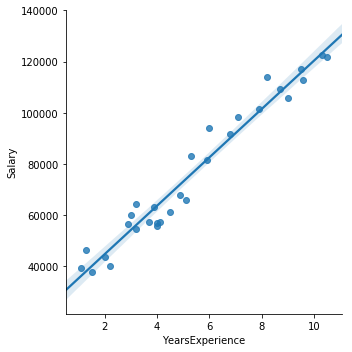

In [8]:
# We can fit a linear regression in this plot

sns.lmplot(x='YearsExperience', y='Salary', data=salary_df)

Linear regression is one of the most basic ways we can model relationships. Our model here can be described as $y=mx+b$, <br>
where m is the slope (to change the steepness), 
<br> b is the bias (to move the line up and down the graph), <br>
x is the features, and y is the output.

A straight line best describes the relation as the Salary should increase when the experience increases. <br>
Based on this straight line with any value of x, we can preedict the value of y. <br>
The difference between the predicted y and the actual y is the error.  <br>
By tweaking the values of m and b, we obtain a straight line which best fits the points.

Our goal is to find the best straight line for which the error is least.  <br>
The optimization technique to find this line is using Gradient Descent.

### 3. Gradient Descent  <a id='grad'>

**Our goal is to minimize the cost function which is the Mean Squared Error**.
$$ MSE = \frac{1}{n} \Sigma_{i=1}^{n} (y_i - \hat y_i)^2 $$

We need to find the values of m and b for which MSE will be the lowest. We need to move the values(increase or decrease) of m and b until we reach the lowest MSE. This is shown in the following gradient descent graph.

<img src='./images/gradient_descent.png'>

What we’re doing here is applying partial derivatives with respect to both m and b to the cost function(MSE) to reach the lowest point. <br>
If you remember your math, a derivative of zero means you are at either a local minima or maxima. Which means that the closer we get to zero, the better.  <br>
When we reach close to zero with our derivatives, we also inevitably get the lowest value for our cost function.

$$ \frac{\delta}{\delta m} = - \frac{2}{n} \Sigma x_i({y_i - \hat y_i}) $$

$$ \frac{\delta}{\delta b} = - \frac{2}{n} \Sigma ({y_i - \hat y_i})  $$

We can find our best fit Linear Regression line when the partial derivative with respect to m and b will be close to 0.

In [41]:
"""
Take the features and labels as X, y
For 1000 iterations, change the update of m_current and b_current using the error and learning rate
"""

cost_list = []
def linear_regression(X, y, m_current=0, b_current=0, iters=1000, learning_rate=0.01):
     N = float(len(y))
     for i in range(iters):
          y_current = (m_current * X) + b_current
          cost = sum([data**2 for data in (y-y_current)]) / N
          m_gradient = -(2/N) * sum(X * (y - y_current))
          b_gradient = -(2/N) * sum(y - y_current)
          m_current = m_current - (learning_rate * m_gradient)
          b_current = b_current - (learning_rate * b_gradient)
          cost_list.append(cost)
     return m_current, b_current, cost

In [42]:
X = salary_df['YearsExperience']
y = salary_df['Salary']

In [43]:
m, b, error = linear_regression(X, y)

In [44]:
print("Slope: ", m)
print("Bias: ", b)
print("Mean Square Error: ", error)

Slope:  9501.013219578916
Bias:  25448.181745946968
Mean Square Error:  31296754.38648182


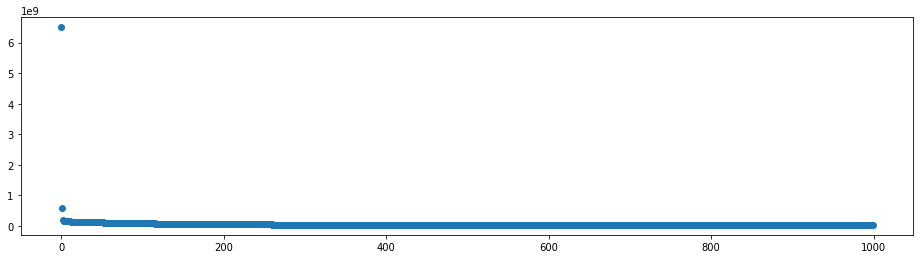

In [59]:
plt.figure(figsize=(16,4))
plt.scatter(x = np.arange(1000), y = cost_list)

We can see that the errors are reducing as the number of iterations increases.

### Linear Regression  <a id='lr'>

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [24]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
model.coef_

array([[9449.96232146]])

In [27]:
model.intercept_

array([25792.20019867])

In [32]:
y_pred = model.predict(X)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

In [34]:
print(mse)

31270951.722280968


### Conclusion  <a id = 'conc'>
** We can observe that the Gradient Descent algorithm provides results as good as the Logistic Regression model** 